# Decision Tree Models
The Decision Tree model can be used to discover complex linear relationships between variables for either prediction, binary classification or multi-output classification. In the first example of a decision tree algorithm I have opted to examine a commonly used dataset which is freely available in Sci-kit Learn called the 'wine' dataset.

## Decision Tree Classification
The first step involves importing the relevant packages from the Python and SciKit-Learn libraries as well as the Wine dataset.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['quality'] = wine.target

# showing the first 5 entries
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Creating this table will help me decide which features to use for the Root Node position for the Decision Tree. Switching out different features in this position can have several deterministic consequences on the overall result. First I have decided to save it as a csv file which enables me to review the dataset in its entirety using spreadsheet analysis but also for preprocessing. It can be useful in case I decide to perform additional feature engineering by creating new data columns which may provide additional insight into the model.

In [2]:
# df.to_csv(r'C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/load_wine.csv')

Looking at some of the common statistics for the dataset using the describe() function:

In [3]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
from sklearn import tree
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, 0:13]
y = wine.target

dtc = tree.DecisionTreeClassifier(max_depth=None)
dtc = dtc.fit(X, y)

Using the plot_tree() method within the DecisionTreeClassifier model and setting the 'filled' attribute to 'True' will color the tree nodes explaining the majority class at each decision point in the tree.

One important idea to note is that the root node which appears at the very top of each decision tree can be changed in order to arrive at the lowest Gini Impurity calculation path. This is done to compare outcomes based on causation associated with different features and the goal is to reduce the Gini Impurity value to that with the lowest impurity, in this case separating the 'Good' and 'Bad' quality wines in the best possible way.

The DecisionTreeClassifier is designed to choose the best split point overall (at the root node) and does a really good job at selecting the next best split points at each decision node.

[Text(0.5657894736842105, 0.9166666666666666, 'X[12] <= 755.0\ngini = 0.658\nsamples = 178\nvalue = [59, 71, 48]'),
 Text(0.34210526315789475, 0.75, 'X[11] <= 2.115\ngini = 0.492\nsamples = 111\nvalue = [2, 67, 42]'),
 Text(0.21052631578947367, 0.5833333333333334, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(0.10526315789473684, 0.4166666666666667, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(0.05263157894736842, 0.25, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.15789473684210525, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.3157894736842105, 0.4166666666666667, 'X[0] <= 13.515\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(0.2631578947368421, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(0.3684210526315789, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.47368421052631576, 0.5833333333333334, 'X[6] <= 0.795\ngini = 0.117\nsamples = 65\nvalue = [2, 61, 2]'),
 Text(0.4210

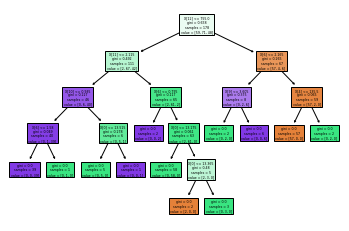

In [5]:
tree.plot_tree(dtc, filled=True)

The visualization of this tree plot can be tidied up using matplotlib:

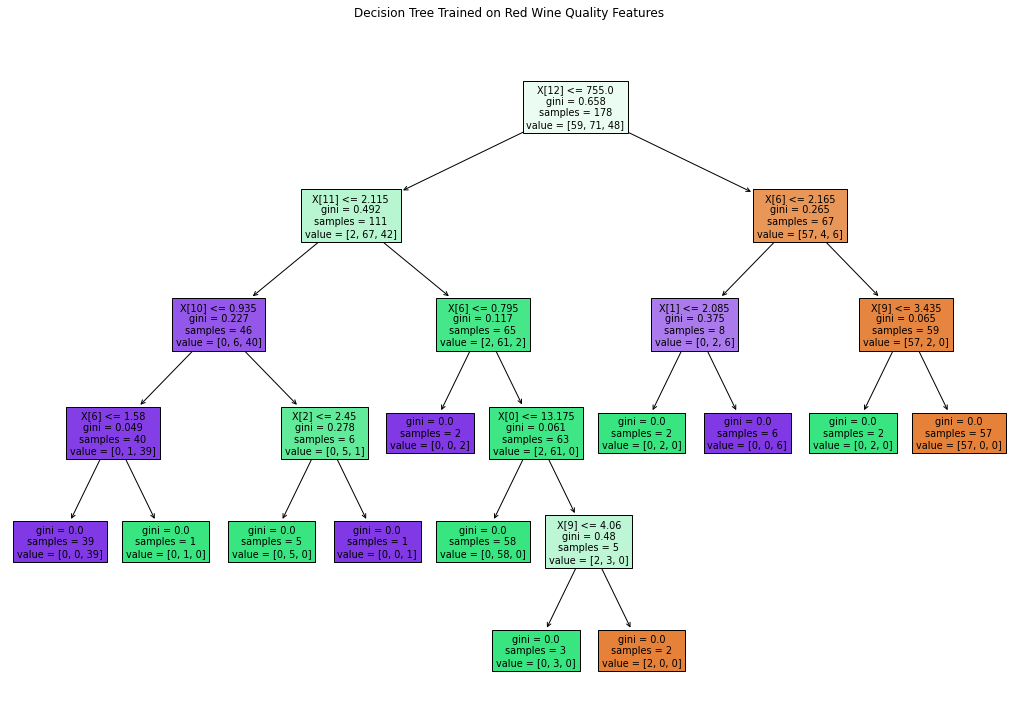

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# important to adjust the size of the plot otherwise it ends up being too small
plt.figure(figsize=(18,12))
dtc = tree.DecisionTreeClassifier().fit(wine.data, wine.target)
plot_tree(dtc, filled=True)
plt.title("Decision Tree Trained on Red Wine Quality Features\n\n")
plt.show()

Repeating the training process but only displaying the 'max_depth' in the classifier to a value of 2 (a depth of 2 levels from the root node), or Tree depth as it's known, is a measure of how many splits a tree can make before it must arrive at a prediction. Note that in these first two examples I have applied the model to the entire dataset but later on will split it into training and test subsets.

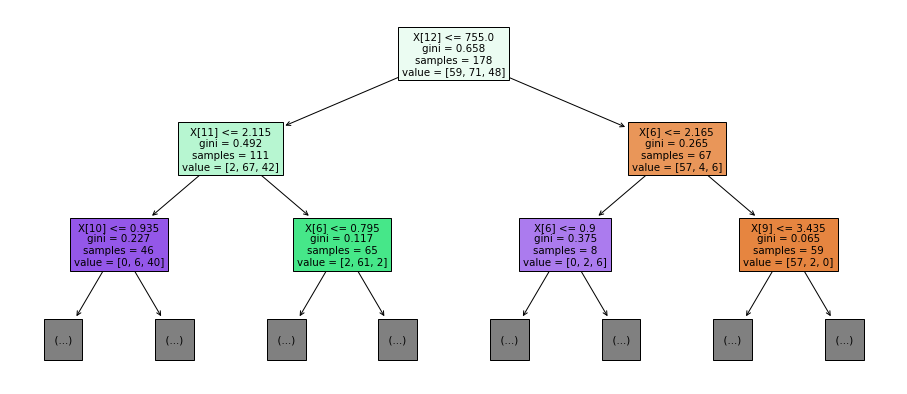

In [7]:
from sklearn import tree
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, 0:13]
y = wine.target

# resizing plot
plt.figure(figsize=(16,7))
dtc = tree.DecisionTreeClassifier(max_depth=None)
dtc = dtc.fit(X, y)
tree.plot_tree(dtc, max_depth=2, filled=True)
plt.show()

## Using Graphviz
This method can be used as an alternative way to display the decision tree and is derived from the SciKit Learn 'tree' model set. It's worth noting I encountered some issues when installing graphviz using Conda (which took considerable time).

In [8]:
# %conda install python-graphviz

Installing with pip may be a better option to get dot file conversion to png format to work.

In [9]:
# %pip install graphviz

Next, in order to create a graphviz export tree diagram 'export_graphviz' must be imported first and then a filepath must be established for the 'dot' file. Then I can derive a graphviz object from this path with a few defining attributes.

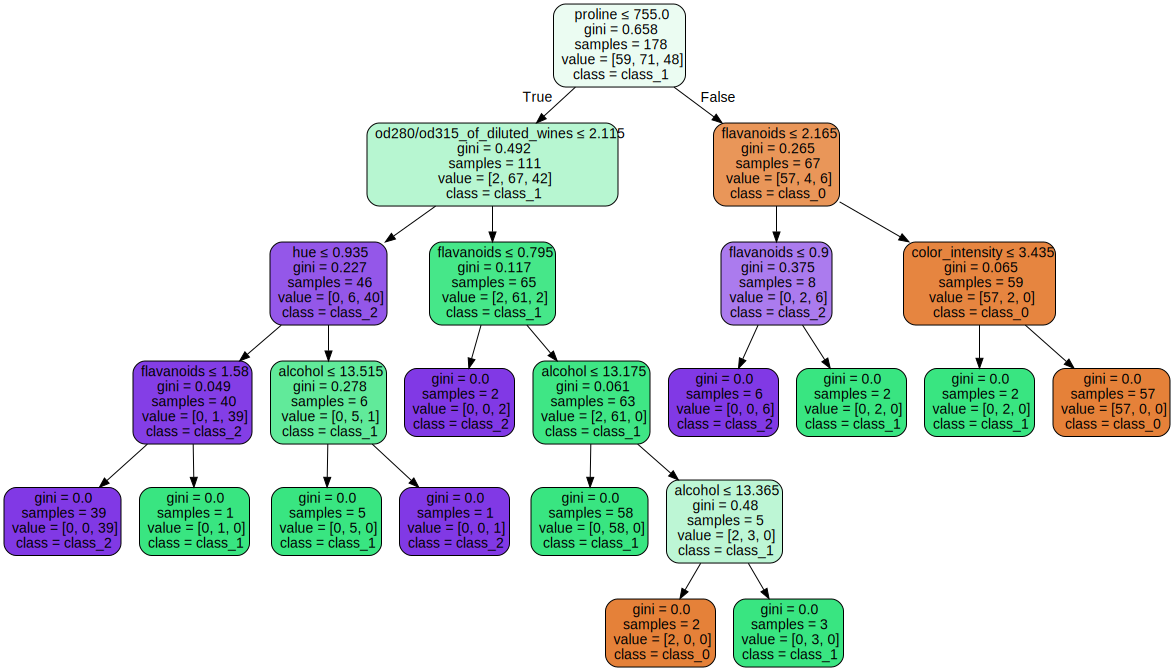

In [10]:
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

#image_path='C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/wine_tree.dot'

dot_data = tree.export_graphviz(dtc, 
                        out_file=None,
                        feature_names=wine.feature_names,
                        class_names=wine.target_names,
                        rounded=True,
                        special_characters=True,
                        filled=True
                       )

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('original_tree.png')
graph.set_size('"2,2!"')
graph.write_png('resized_tree.png')


graph = graphviz.Source(dot_data)
graph

Converting the dot file to a png file requires a stand-alone installation of graphviz, or a pip installation.

In [11]:
#!dot -Tpng wine_tree.dot -o wine_tree.png

Next in order to try and predict unseen target data based on the labels already used, I can categorize ranked estimates for the quality of wine using a four stage model. Splitting the data first into training and test sets, fitting the DecisionTreeClassifier to the training set and using it to predict the test set to make estimates.

It's worth noting that once the predictions are made they will need to be validated using some measure of accuracy. This is determined by the Gini Impurity attribute and the degree to which all the training instances at a node belong to a particular class. A Gini value of 0.0 is completely pure meaning all the instances belong to one class only.

In [12]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0, test_size=0.25)

# Initiate a 4 step modeling pattern
# Step 1: import the model to use
from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model and set criterion parameter to gini
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

# Step 3: Train the model on the data
dtc.fit(X_train, y_train)

# Step 4: Predict labels of unseen (test) data
dtc.predict(X_test)

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1])

The total number of entries in the 'wine' dataset:

In [13]:
df.count()

alcohol                         178
malic_acid                      178
ash                             178
alcalinity_of_ash               178
magnesium                       178
total_phenols                   178
flavanoids                      178
nonflavanoid_phenols            178
proanthocyanins                 178
color_intensity                 178
hue                             178
od280/od315_of_diluted_wines    178
proline                         178
quality                         178
dtype: int64

So I have 178 entries in total and 14 columns, including thirteen features and one target column. The training set is represented by 75% of the total values.

In [14]:
print(X_train.shape)
print(y_train.shape)

(133, 13)
(133,)


And the size of the test set is 25% of the values.

In [15]:
print(X_test.shape)
print(y_test.shape)

(45, 13)
(45,)


The action of using the predict function provides 45 estimates (25%) for the test set values based on the training data (75%). Let's see if there's any improvement if I were to change the train-test-split test size to 0.2, or 20%.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0, test_size=0.2)
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_pred

array([0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0])

## Score
The score used is from the metrics library and is specifically for multi-class classification measuring the success rate for subset accuracy. Essentially the accuracy score measures the number of times the y predictions are correct given the actual y target values, for example using a 1-d array to list the values in 'y_pred' and 'y_true', then applying the accuracy score as below. Assume there are only 4 values, the code would look a little like this:

In [17]:
print(y_test)

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
141    2
146    2
5      0
98     1
168    2
80     1
33     0
18     0
61     1
51     0
66     1
37     0
4      0
104    1
60     1
111    1
126    1
86     1
112    1
164    2
26     0
56     0
129    1
45     0
8      0
44     0
Name: quality, dtype: int32


Lets transpose this list of values for convenience.

In [18]:
y_test = np.array(y_test).T
print(y_test)

[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]


In [19]:
print(y_pred)

[0 2 0 0 1 0 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 0 1 2 2 0 0 1 0 0 0]


Comparing the two lists of actual and predicted values gives:

In [20]:
y_test = [0,2,1,0,1,1,0,2,1,1,2,2,0,1,2,1,0,0,1,0,1,0,0,1,1,1,1,1,1,2,0,0,1,0,0,0]
y_pred = [0,2,0,0,1,0,0,2,1,1,2,2,0,0,2,1,0,0,2,0,0,0,0,1,1,1,0,1,2,2,0,0,1,0,0,0]

One way to calculate the total number of accurately predicted observations

In [21]:
y_total = 36
y_pred_correct = 29

accuracy = (y_pred_correct / y_total) * 100
print(accuracy)

80.55555555555556


The same measurement can be achieved by applying the 'accuracy_score' function after training the decision tree model and fitting the data.

In [22]:
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
# rounding to 5 decimal places
acc_dtc = round(accuracy_score(y_pred, y_test) * 100, 5)
print(acc_dtc)

97.22222


So, in terms of evaluation, this model does not inspire a terrific amount of confidence in predicting unseen data correctly which is where parameter tuning will be required to improve upon this score.

## Feature Engineering
Taking a look at the correlation between various features may help to establish some ideas for engineering better optimization solutions. Then I can try fine-tuning the chosen model afterwards.

In [23]:
correlation = df.corr()
print(correlation)

                               alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
quality                      -0.328222    0.437776 -0.049643   

                              alcalinit

Looking at the target column entitled 'quality' the highest positive correlation is with 'alcalinity_of_ash' at 0.517859. The highest negative correlated feature is 'flavanoids' at -0.847498.

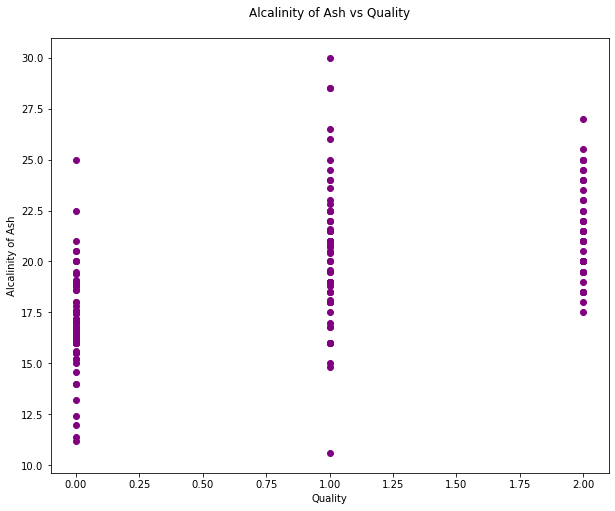

In [24]:
# Plot the width and height of the figure
plt.figure(figsize=(10, 8))
# Plot the chosen variables, labels and color
plt.scatter(df['quality'], df['alcalinity_of_ash'], marker='o', color='purple')
plt.title('Alcalinity of Ash vs Quality\n')
plt.xlabel('Quality')
plt.ylabel('Alcalinity of Ash')
plt.show()

So the concentration of values centres around the three classes, or categories of quality which are 0, 1 and 2 with successively higher alcalinity of ash from 0 through 2. It's important to note that the range of values generally start at slightly higher minimums for each quality type.

I think this data would be more beneficial if I could tell the average 'Alcalinity of Ash' for each grade or 'Quality' of wine, so the average for 0, 1 and 2. Delving into this relationship a bit closer involves looking at the mean values for each distribution, which can be achieved by placing the different qualities in separate buckets and finding their average.

In [25]:
mean_alcalinity = df['quality'].groupby(df['alcalinity_of_ash']).mean()
mean_alcalinity

alcalinity_of_ash
10.6    1.0
11.2    0.0
11.4    0.0
12.0    0.0
12.4    0.0
       ... 
26.0    1.0
26.5    1.0
27.0    2.0
28.5    1.0
30.0    1.0
Name: quality, Length: 63, dtype: float64

In [26]:
# wine quality counts for each value of 'alcalinity_of_ash'
m_a = df.groupby(df['quality'])['alcalinity_of_ash'].value_counts().unstack(fill_value=0)
df_counts = pd.DataFrame(m_a)

# print count frequency for alcalinity of ash values v quality
print(df_counts)

alcalinity_of_ash  10.6  11.2  11.4  12.0  12.4  13.2  14.0  14.6  14.8  15.0  \
quality                                                                         
0                     0     1     1     1     1     1     2     1     0     1   
1                     1     0     0     0     0     0     0     0     1     1   
2                     0     0     0     0     0     0     0     0     0     0   

alcalinity_of_ash  ...  23.6  24.0  24.5  25.0  25.5  26.0  26.5  27.0  28.5  \
quality            ...                                                         
0                  ...     0     0     0     1     0     0     0     0     0   
1                  ...     1     2     1     1     0     1     1     0     2   
2                  ...     0     3     2     3     1     0     0     1     0   

alcalinity_of_ash  30.0  
quality                  
0                     0  
1                     1  
2                     0  

[3 rows x 63 columns]


This provides a total of only 63 different values, or variations in 'Alcalinity of Ash'. 10 values fell under quality=0, 13 values fell under quality=1 and a further 10 values under quality=3.

In [27]:
df['quality'].describe()

count    178.000000
mean       0.938202
std        0.775035
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: quality, dtype: float64

In [28]:
df['alcalinity_of_ash'].describe()

count    178.000000
mean      19.494944
std        3.339564
min       10.600000
25%       17.200000
50%       19.500000
75%       21.500000
max       30.000000
Name: alcalinity_of_ash, dtype: float64

In [29]:
# calculating the mean values for each grade or quality gives:
mean_quality = df.groupby(['quality'])['alcalinity_of_ash'].mean()
print(mean_quality)

quality
0    17.037288
1    20.238028
2    21.416667
Name: alcalinity_of_ash, dtype: float64


Therefore, now I have the 3 mean values for quality 0, 1 and 2 I will check to see if the average of all 3 corresponds to the mean value for alcalinity of ash above in the describe( ) method for the dataframe.

In [30]:
mean = (17.037288 + 20.238028 + 21.416667) / 3
print(mean)

19.563994333333337


19.494944 is the original mean value so there is a slight discrepancy but reason I calculated the mean values for 'alacalinity of ash' for each grade or 'quality' of wine shows how it increases slightly. We can see this information displayed in the plot above.

To display the correlation matrix of features in a plot I have decided to assign the color-mapping parameter 'cmap' in the imshow() function. This helps me to understand the relationship between the predictor variables in a more visually pleasing manner.

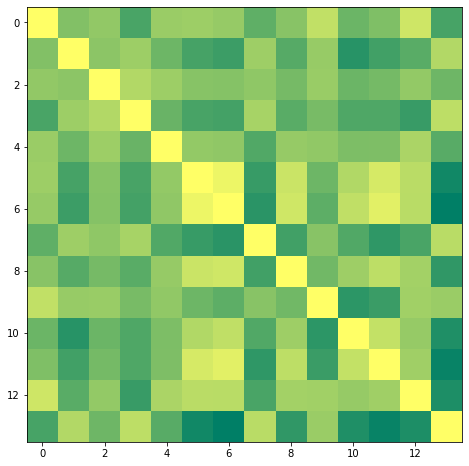

In [31]:
# Plot the width and height of the figure
plt.figure(figsize=(8, 8))
# Select the corr() function on the dataframe and assign it to a 'correlation' variable
correlation = df.corr()
plt.imshow(correlation, cmap = 'summer', interpolation='nearest')
plt.show()

The total number of columns or features is 14 (0 through 13). The lighter green color represents a stronger positive correlation; the darker green colors are strongly negatively correlated with each other.

A better way to show the correlation matrix is below:

C:\Users\lynst\AppData\Local\Temp\ipykernel_18796\1712538832.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


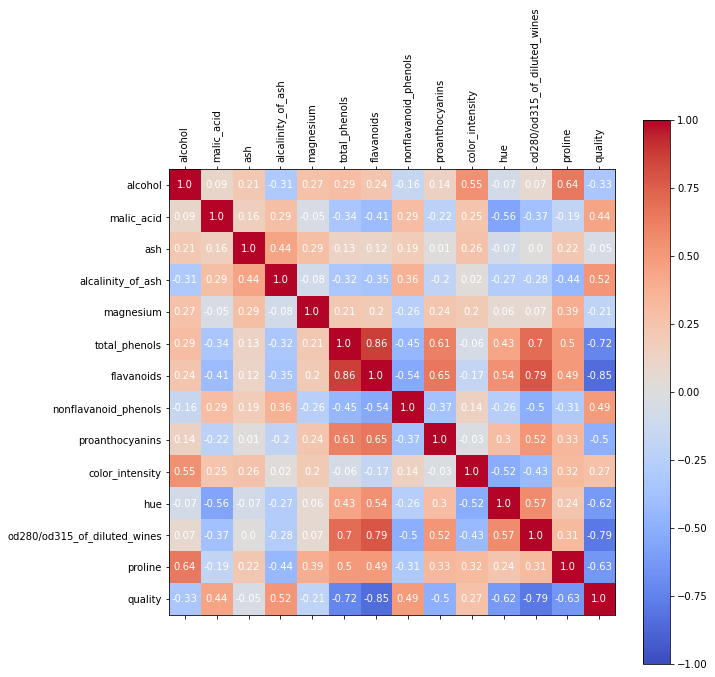

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(correlation, cmap='coolwarm', vmin=-1, vmax=1)

fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)

ax.set_xticklabels(df.columns)
plt.xticks(rotation = 90)

ax.set_yticklabels(df.columns)
ax.set_yticks(ticks)

# print the correlation factor
for i in range(df.shape[1]):
    for j in range(14):
        text = ax.text(j, i, round(correlation.iloc[i][j],2), ha="center", va="center", color="w")
plt.show()    

In this example the darker red color represents a higher, positive correlation. The cooler blue color represents a higher, negative correlation. The lighter shades of red and blue are less correlated features, so overall I can determine the best relationships among the different features and utilize them for a better machine learning model.

Key associations occur between 'flavanoids' and 'total_phenols' (0.86) indicating a fairly high, positive, correlation between these two variables. This may contribute to a better grade or quality of wine also. Let's present this positive relationship in another visual.

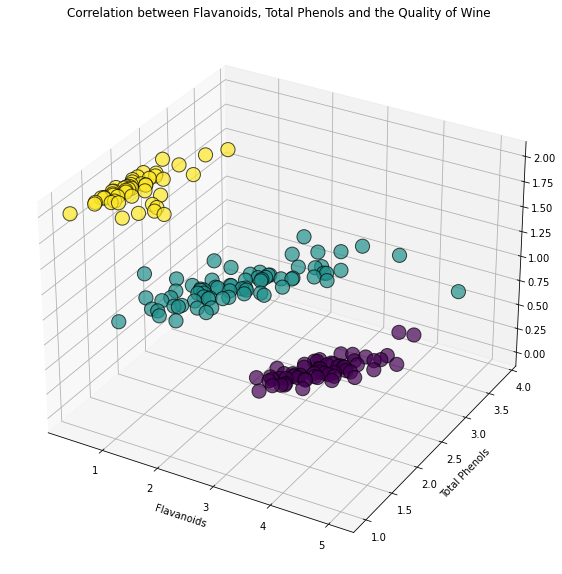

In [33]:
# code for plot showing relationship between 'flavanoids', 'total_phenols' and 'quality' in wine data
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = df['flavanoids']
y = df['total_phenols'] 
z = df['quality']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, linewidths=1, alpha=.7, edgecolor='k', s = 200, c=z)
plt.title('Correlation between Flavanoids, Total Phenols and the Quality of Wine')
plt.xlabel('Flavanoids')
plt.ylabel('Total Phenols')
plt.show()

In order to describe this visualization I have chosen a 3-D graph in the form of a scatterplot. Essentially we can see there are 3 main qualities of wine labeled 0 (purple), 1 (turquoise) and 2 (yellow). Now if we look at the interaction between Flavanoids and Total Phenols it shows how the distribution of data lies between these two features.

At quality 2, I can safely say that Flavanoids and Total Phenols all reside in a fairly consistent, lower range of values which are tightly grouped together. Where the quality of wine equals 1, the range of values appear to be much larger over these two features and show some linearity. Quality equals 0 appears to have slightly higher values for both Flavanoids and Total Phenols, which are not only more tightly grouped but also more linear in their relationship.

In conclusion I would say that better quality wines should exhibit a much lower concentration of Flavanoids relative to Total Phenols.

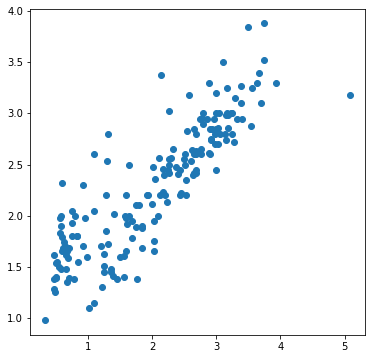

In [34]:
x = df['flavanoids']
y = df['total_phenols']

fig = plt.figure(figsize=(6, 6))
plt.scatter(x, y)
plt.show()

Flavanoids and Total Phenols are strongly associated with wine quality and antioxidant properties which are important constituents and appear to exhibit a positive, almost linear relationship with each other. Attributes of wine quality include color, flavor and taste. It's also important to understand the ecosystem involved in wine production which relies heavily on soil, climate (and atmospheric conditions), altitude and grape lineage.

A more detailed model would probably look into some of this data in causal analysis and may provide a better, more accurate model for classification purposes but the main point to remember is that it's important to understand the dataset's origins and the quality of information provided, otherwise the 'garbage in - garbage out' problem ensues.

## Making a Prediction
So the root node splits using the 'Proline' feature which is the most abundant amino acid in grapes. The next layer at depth 1 has two different splits, one using the 'od280/od315_of_diluted_wines' Protein concentration (111 values) and another using 'flavonoids' which represent high color content (67 values), before finally moving on to layer 2 which is the max_depth specified in this case.

I can try and classify a wine based on it's features (all 13) and the path defined by each decision boundary until we reach the end. In order to use the predict_proba() function I would have to input values for each of the 13 features in order to classify the target prediction as follows:

Calculating the probabilities of each class occurring is as follows (given a max_depth of 2 layers):

In [35]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.tree import export_graphviz

wine = load_wine()
X = wine.data[:, 0:13]
y = wine.target

dtc = tree.DecisionTreeClassifier(max_depth=None)
dtc = dtc.fit(X, y)

dot_data = tree.export_graphviz(
        dtc, 
        out_file="wine.dot",
        feature_names=wine.feature_names[0:13],
        class_names=wine.target_names,
        rounded=True,
        special_characters=True,
        filled=True
    )

# choose all the features or attributes for prediction, placing them in an (m x n) matrix
dtc.predict_proba([[13.0, 1.90, 2.38, 16.8, 110, 3.0, 2.94, 0.3, 2.0, 4.9, 1.05, 3.12, 840]])

array([[1., 0., 0.]])

So the results are split into three possible outcomes or classes, where wine quality equals 0, 1 or 2. Each class specified or predicted will show the percentage likelihood of occurrence. My output prediction shows a 100% likelihood of wine quality falling under the '0' class.

## The Iris Dataset
Another example of this process can be repeated using another dataset from scikit-learn's databases, the Iris dataset. Note that I will not be splitting the data into training, validation or test sets for the purpose of this example which means it would be unreliable if applied to any unseen or new data.

In [36]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [37]:
iris = load_iris()
X = iris.data # petal length and width
y = iris.target
features = iris.feature_names

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [38]:
X.shape

(150, 4)

In [39]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [40]:
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Data is now loaded into X (the predictors) and y (the classifications). Define a cross-validation to check the results using decision trees:

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)

Define the max_depth parameter inside the iterative loop to experiment with increasing the complexity of the model tree.

In [42]:
import numpy as np
from sklearn import tree

for depth in range(1, 10):
    tree_clf = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    if tree_clf.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_clf, X, y, scoring='accuracy', cv=crossvalidation))
print('Depth: %i Accuracy: %.3f' % (depth,score))

Depth: 6 Accuracy: 0.920


Should expect to reach an ideal point quickly, then witness decreasing cross-validation due to overfitting. As we can see the best solution is the tree with 6 splits (levels)because after that it starts overfitting.

In [43]:
tree_clf = tree.DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=0)
tree_clf.fit(X,y)
score = np.mean(cross_val_score(tree_clf, X, y, scoring='accuracy', cv=crossvalidation))
print(score)

0.9133333333333333


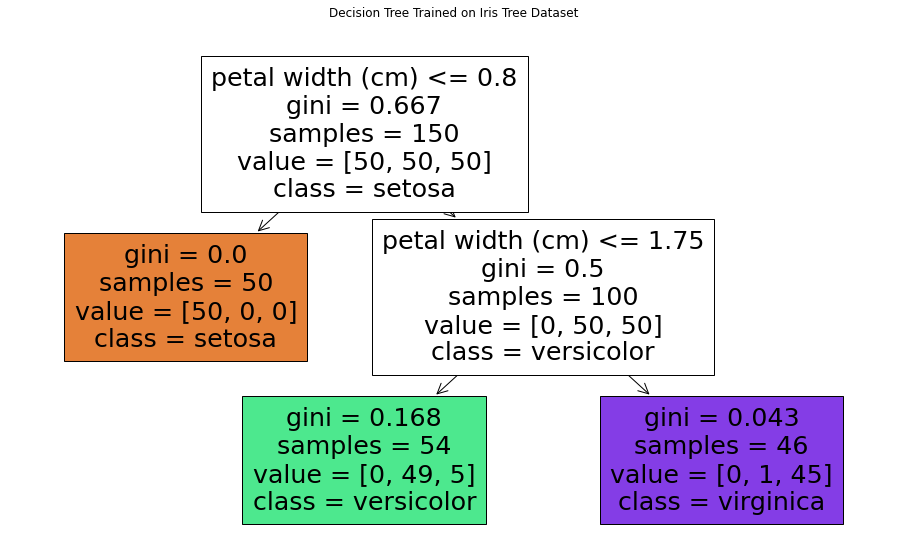

In [44]:
# important to adjust the size of the plot otherwise it ends up being too small
plt.figure(figsize=(16,9))
tree_clf = tree.DecisionTreeClassifier(max_depth=2).fit(iris.data, iris.target)
plot_tree(tree_clf, 
        feature_names=iris.feature_names,  
        class_names=iris.target_names,
        filled=True
    )
plt.title("Decision Tree Trained on Iris Tree Dataset\n\n")
plt.show()

In [45]:
tree_clf.predict_proba([[5, 3.2, 1.5, 1.2]])

array([[0.        , 0.90740741, 0.09259259]])

Analyzing this output leads me to the conclusion that there is a 91% probability that the type of Iris leaf image falls under the class of Iris Versicolor. 

Following this logically I know that the root node decision boundary specifies the petal width is <= 0.8. We know that my predictor instance has a petal width of 1.2 > 0.8. The next decision boundary asks if petal width is <= 1.75, so I know 1.2 is less which enables me to follow this layer to the 2nd and final layer, a leaf node with Gini=0.168, 54 samples, 49 of which fall under the class=versicolor (90.7%).

## Fine-Tuning Hyperparameters
Having already used the 'max_depth' and 'criterion' hyperparameters so far it might be prudent to explore others in order to restrict the degree of freedom and to avoid any over-fitting in the model. Observing some of the hyperparameters and attributes listed in the DecisionTreeClassifier model will enable better control to prevent lower bias and higher variance which is a side-effect of over-fitting.

This means in the existing model may memorize existing data but will not have learned from the algorithm sufficiently to be reliable when it's applied to unseen data.

First of all I'm going to try and adjust the 'criterion' parameter and see what effect this has on model accuracy:

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['quality'] = wine.target

In [48]:
X = wine.data[:, 0:13]
y = wine.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0, test_size=0.2)
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0, max_leaf_nodes=2)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
predictions

array([0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [50]:
# print y_test and prediction values:
print(y_test)

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
141    2
146    2
5      0
98     1
168    2
80     1
33     0
18     0
61     1
51     0
66     1
37     0
4      0
104    1
60     1
111    1
126    1
86     1
112    1
164    2
26     0
56     0
129    1
45     0
8      0
44     0
Name: quality, dtype: int32


In [51]:
print(predictions)

[0 2 0 0 0 0 0 2 0 2 2 2 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0]


In [52]:
# rounding to 5 decimal places
acc_dtc = round(accuracy_score(predictions, y_test) * 100, 5)
print(acc_dtc)

55.55556


So the score has decreased significantly changing the criterion to 'entropy' instead of 'gini'. Changing it back to 'gini' but including the 'splitter' parameter:

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0, test_size=0.2)
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, splitter='best', random_state=0, min_samples_leaf=20)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
acc_dtc = round(accuracy_score(predictions, y_test) * 100, 5)
print(acc_dtc)

80.55556


A little better, but not much.

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0, test_size=0.2)
dtc = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
acc_dtc = round(accuracy_score(predictions, y_test) * 100, 5)
print(acc_dtc)

80.55556


But if I remove the max_depth parameter altogether I get:

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[wine.feature_names], df['quality'], random_state=0, test_size=0.2)
dtc = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=0)
dtc.fit(X_train, y_train)
predictions = dtc.predict(X_test)
acc_dtc = round(accuracy_score(predictions, y_test) * 100, 5)
print(acc_dtc)

97.22222


The model's nodes are allowed to expand until all the leaves are pure and the tree is extended as far as it can go.

## Decision Tree Regression
The following example will continue with the price prediction theme for Bitcoin crypto-currency with relatively fewer features than the classification example. This time I would like to apply a Decision Tree Regression model to the entire dataset before seeking further improvement in prediction accuracy and lowering variance.

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# select data for modeling
bitcoin = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

#load data into dataframe
df = pd.DataFrame(bitcoin).dropna(axis=0)
# select features and target data
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

## Split the Dataset into Train and Test Subsets

In [57]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(253, 4)
(253,)
(109, 4)
(109,)


In [58]:
# train and fit the decision tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [59]:
# predict
y_pred = tree_reg.predict(X_test)

Now trying a prediction on the working linear model (first 5 values):

In [60]:
print(y_pred[:5])

[17666.01 41341.23 13253.52 13442.84 21095.38]


Measuring the RMSE and r-squared score for the linear model.

In [61]:
y_pred = tree_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
    
r2_train = r2_score(y_test, y_pred)
print(r2_train)

998.4558064230071
0.9975752114277521


Next I will try dividing the dataframe into several smaller training and validation sets and perform the decision tree analysis on each. This is done using K-Fold Cross Validation and the mean validation score is used to see if there is any improvement.

## Cross Validation
This method will evaluate the Decision Tree model by splitting the training set into several smaller training and validation sets for training and evaluation separately. This is achieved by using the K-fold cross validation technique and I have split the data into 10 separate folds, cv=10 (which can be changed).

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
r2_test = r2_score(y_test, y_pred)
                         
def display_scores(scores):
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Standard Deviation", scores.std())
    print("R-Squared:", r2_test)
          
display_scores(tree_rmse_scores)

Scores: [1594.96533543 2723.76070067 1380.43291953 1587.02224158 1156.38127812
 1600.81802465 1866.43550333 1517.46046855 1703.68449836 1209.74651659]
Mean 1634.0707486806139
Standard Deviation 416.8069785722907
R-Squared: 0.9975752114277521


So the average of the RMSE scores has decreased relative to the R-squared value. Comparing the scores from cross validation of the DecisionTreeRegressor model to those from the LinearRegression model:

In [63]:
# instantiate model
lin_reg = LinearRegression()

# fit model
lin_reg.fit(X_train, y_train)

lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [873.89562556 978.49089698 708.25187252 389.29477539 908.56489005
 505.32560623 741.94580962 766.5534399  671.31173392 507.85427701]
Mean 705.1488927197572
Standard Deviation 181.51221089972861
R-Squared: 0.9975752114277521


## Evaluation
With respect to the Decision Tree Classifier models improvements could be made by better exploratory data analysis, feature selection and dimensionality reduction. Also, it's worth pointing out that improvements to hyperparameter fine-tuning such as increasing any 'min' parameters and decreasing any 'max' parameters can be used to regularize the model, reducing over-fitting.

The Linear Regression model appears to reduce the Standard Error but the accuracy for the estimates is the same overall.

In [64]:
# pickle file to go here

## Print Dependencies
Dependences are fundamental to record the computational environment.

Use watermark to print version of python, ipython, and packages, and characteristics of the computer

In [65]:
# %pip install watermark

In [66]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,tarfile,urllib3,matplotlib,sklearn,graphviz,pydotplus

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.2.0

wget      : not installed
pandas    : 1.4.2
numpy     : 1.21.5
watermark : 2.3.1
tarfile   : 0.9.0
urllib3   : 1.26.9
matplotlib: 3.5.1
sklearn   : 1.0.2
graphviz  : 0.20
pydotplus : 2.0.2

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Thu Jul 21 2022 21:43:11Eastern Daylight Time

